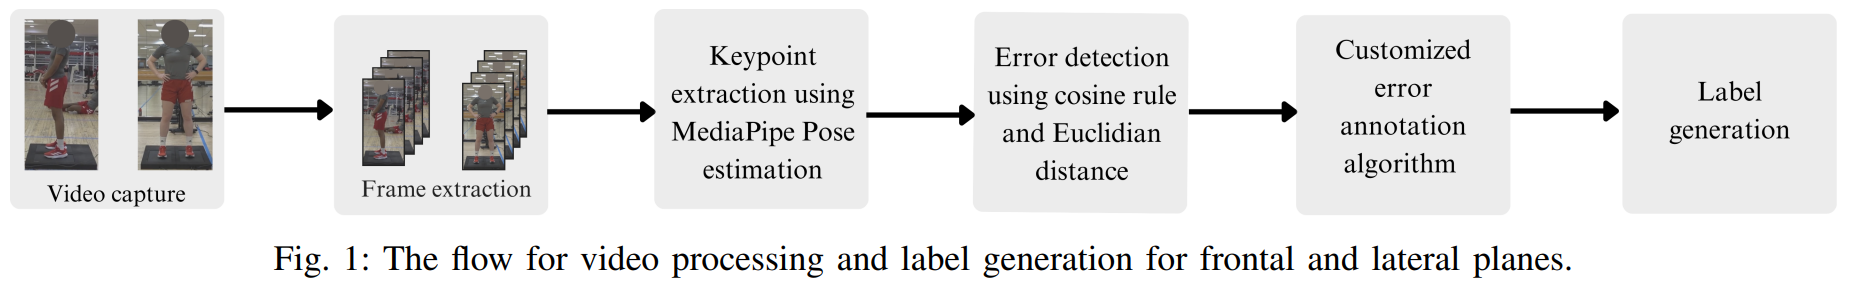

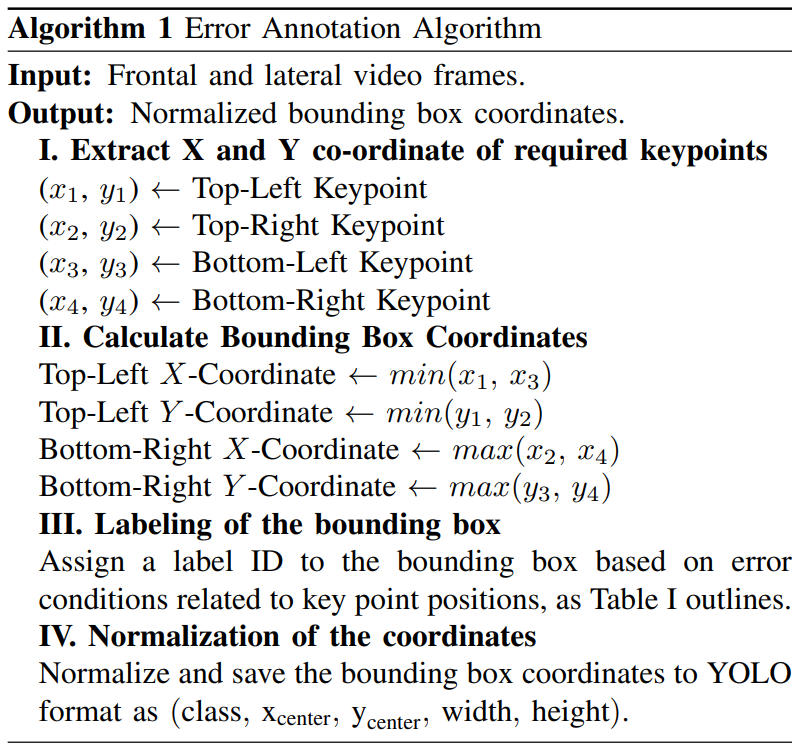

# Libraries Requirements

math

cv2

google

ultralytics

wandb

shutil

mediapipe

csv

PIL

random

os

numpy

# Specific versions:

numpy==1.26.4

opencv-python==4.9.0.80

ultralytics==8.2.0

wandb==0.16.6

mediapipe==0.10.9

pillow==10.2.0

**Video Processing**

Generate image frames from video.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import os

def divide_video(video_path, output_dir, num_frames=200):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video file opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        exit()

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval to pick 200 frames
    interval = max(1, total_frames // num_frames)

    # Initialize frame counter
    frame_count = 0

    while frame_count < num_frames:
    # Set the video position to the current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count * interval)

        # Read the frame
        ret, frame = cap.read()

        # Break the loop if no frame is returned
        if not ret:
            break

        frame = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)
        # Resize the frame to 640x640
        resized_frame = cv2.resize(frame, (640, 640))

        # Save the resized frame as an image file
        frame_filename = os.path.join(output_dir, f"01frame_{frame_count:03d}.jpg")
        cv2.imwrite(frame_filename, frame)

        # Increment the frame counter
        frame_count += 1

    # Release video capture object
    cap.release()

# Path to the input video
video_path = "/content/drive/MyDrive/ICASSP/00001.mp4"  # Replace with your video path

# Output directory to save frames
output_dir = "/content/drive/MyDrive/ICASSP/Frames"  # Change to your desired output directory

# Divide video into 200 frames
divide_video(video_path, output_dir, num_frames=200)

**Calulate coordinates using Mediapipe**

Extracting shoulder, hip, ankle, heel and foot for frontal and lateral.

In [ ]:
!pip install mediapipe

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import mediapipe as mp
import math
import numpy as np

def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

# Function to draw specific keypoints on the image
def draw_specific_keypoints(image, results=None):
    if not results:
        return image

    landmarks = results.pose_landmarks.landmark

    # Define the keypoints to be drawn
    LEFT_SHOULDER = 11
    RIGHT_SHOULDER = 12
    LEFT_HIP = 23
    RIGHT_HIP = 24
    LEFT_ANKLE = 27
    RIGHT_ANKLE = 28
    LEFT_HEEL = 29
    RIGHT_HEEL = 30
    LEFT_FOOT_INDEX = 31
    RIGHT_FOOT_INDEX = 32

    # Calculate coordinates for the key points
    left_shoulder_point = (int(landmarks[LEFT_SHOULDER].x * image.shape[1]), int(landmarks[LEFT_SHOULDER].y * image.shape[0]))
    right_shoulder_point = (int(landmarks[RIGHT_SHOULDER].x * image.shape[1]), int(landmarks[RIGHT_SHOULDER].y * image.shape[0]))
    shoulder_midpoint = ((left_shoulder_point[0] + right_shoulder_point[0]) // 2, (left_shoulder_point[1] + right_shoulder_point[1]) // 2)
    left_hip_point = (int(landmarks[LEFT_HIP].x * image.shape[1]), int(landmarks[LEFT_HIP].y * image.shape[0]))
    right_hip_point = (int(landmarks[RIGHT_HIP].x * image.shape[1]), int(landmarks[RIGHT_HIP].y * image.shape[0]))
    hip_midpoint = ((left_hip_point[0] + right_hip_point[0]) // 2, (left_hip_point[1] + right_hip_point[1]) // 2)
    left_ankle_point = (int(landmarks[LEFT_ANKLE].x * image.shape[1]), int(landmarks[LEFT_ANKLE].y * image.shape[0]))
    right_ankle_point = (int(landmarks[RIGHT_ANKLE].x * image.shape[1]), int(landmarks[RIGHT_ANKLE].y * image.shape[0]))
    ankle_midpoint = ((left_ankle_point[0] + right_ankle_point[0]) // 2, (left_ankle_point[1] + right_ankle_point[1]) // 2)
    left_heel = (int(landmarks[LEFT_HEEL].x * image.shape[1]), int(landmarks[LEFT_HEEL].y * image.shape[0]))
    right_heel = (int(landmarks[RIGHT_HEEL].x * image.shape[1]), int(landmarks[RIGHT_HEEL].y * image.shape[0]))
    left_foot_index = (int(landmarks[LEFT_FOOT_INDEX].x * image.shape[1]), int(landmarks[LEFT_FOOT_INDEX].y * image.shape[0]))
    right_foot_index = (int(landmarks[RIGHT_FOOT_INDEX].x * image.shape[1]), int(landmarks[RIGHT_FOOT_INDEX].y * image.shape[0]))

    hip_midpoint_x, hip_midpoint_y = hip_midpoint
    ankle_midpoint_x, ankle_midpoint_y = ankle_midpoint
    shoulder_midpoint_x, shoulder_midpoint_y = shoulder_midpoint
    left_foot_x, left_foot_y = left_foot_index
    right_foot_x, right_foot_y = right_foot_index
    left_heel_x, left_heel_y = left_heel
    right_heel_x, right_heel_y = right_heel

    print("Hip Midpoint Coordinates:", hip_midpoint_x, hip_midpoint_y)
    print("Ankle Midpoint Coordinates:", ankle_midpoint_x, ankle_midpoint_y)
    print("Shoulder Midpoint Coordinates:", shoulder_midpoint_x, shoulder_midpoint_y)
    print("Right Heel Coordinates:", right_heel_x, right_heel_y)
    print("Left Heel Coordinates:", left_heel_x, left_heel_y)
    print("Right Foot Coordinates:", right_foot_x, right_foot_y)
    print("Left Foot Coordinates:", left_foot_x, left_foot_y)

    distance_ankle = calculate_distance(left_ankle_point, right_ankle_point)
    distance_shoulder = calculate_distance(left_shoulder_point, right_shoulder_point)
    stance_width = distance_shoulder / distance_ankle
    footSym = abs(right_foot_y - left_foot_y)
    right_ankle_plantar_flexion = ""

    if (right_foot_y >= right_heel_y):
        right_ankle_plantar_flexion = "toe_to_heel"
    elif (right_heel_y < right_foot_y):
        right_ankle_plantar_flexion = "heel_to_toe"

    left_ankle_plantar_flexion = ""

    if (left_foot_y >= left_heel_y):
        left_ankle_plantar_flexion = "toe_to_heel"
    elif (left_heel_y < left_foot_y):
        left_ankle_plantar_flexion = "heel_to_toe"

    print("Distance between shoulders:", distance_shoulder)
    print("Distance between ankles:", distance_ankle)
    print("Stance Width:",stance_width)
    print("Foot Sym:", footSym)
    print("Right ankle plantar flexion: ", right_ankle_plantar_flexion)
    print("Left ankle plantar flexion: ", left_ankle_plantar_flexion)

    # Draw circles for the keypoints with increased size
    radius = 6  # Increase the size of the circles
    cv2.circle(image, left_shoulder_point, radius, (255, 255, 255), -1)
    cv2.circle(image, right_shoulder_point, radius, (255, 255, 255), -1)
    cv2.circle(image, shoulder_midpoint, radius, (255, 255, 255), -1)
    cv2.circle(image, left_hip_point, radius, (255, 255, 255), -1)
    cv2.circle(image, right_hip_point, radius, (255, 255, 255), -1)
    cv2.circle(image, hip_midpoint, radius, (255, 255, 255), -1)
    cv2.circle(image, left_ankle_point, radius, (255, 255, 255), -1)
    cv2.circle(image, right_ankle_point, radius, (255, 255, 255), -1)
    cv2.circle(image, ankle_midpoint, radius, (255, 255, 255), -1)
    cv2.circle(image, right_heel, radius, (255, 255, 255), -1)
    cv2.circle(image, left_heel, radius, (255, 255, 255), -1)
    cv2.circle(image, right_foot_index, radius, (255, 255, 255), -1)
    cv2.circle(image, left_foot_index, radius, (255, 255, 255), -1)
    frame_top = (hip_midpoint_x, 0)
    cv2.circle(image, frame_top, 5, (0, 0, 0), -1)

    # a = np.array(hip_midpoint)
    # b = np.array(ankle_midpoint)
    # c = np.array(shoulder_midpoint)

    ba = np.array(frame_top) - np.array(hip_midpoint)
    bc = np.array(shoulder_midpoint) - np.array(hip_midpoint)

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)

    print(np.degrees(angle))

    bx1 = min(right_foot_x,left_foot_x)-6
    bx2 = max(right_foot_x,left_foot_x)+6
    by1 = min(right_foot_y,left_foot_y)-6
    by2 = max(right_foot_y,left_foot_y)+6
    cv2.rectangle(image, (bx1, by1), (bx2, by2), (0, 255, 0), 2)


    return image

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Load the image
image_path = '/content/drive/MyDrive/ComputerVision/VideoFrames/00001/frame_000.jpg'
image = cv2.imread(image_path)

# Check if image is loaded properly
if image is None:
    print("Error: Unable to load the image.")
else:
    # Process the image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    # Draw specific keypoints on the image
    image_with_keypoints = draw_specific_keypoints(image.copy(), results)

    # Display the image with keypoints
    cv2_imshow(image_with_keypoints)




**Annotationing Frames**

In [ ]:
from PIL import Image
import cv2
import os
import numpy as np
import math
import mediapipe as mp

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

# Function to calculate angle between three points
def calculate_angle(ba,bc):
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    cross = np.cross(ba, bc)
    if cross < 0:
        angle = -angle
    return np.degrees(angle)

def get_image_size(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        return [width, height]

def yoloCoords(bx1,bx2,by1,by2,size):
    image_width = size[0]
    image_height = size[1]

    center_x = ((bx1+bx2)/2.0)/image_width
    center_y = ((by1+by2)/2.0)/image_height
    width = (bx2-bx1)/image_width
    height = (by2-by1)/image_height

    return [center_x,center_y,width,height]


def generate_annotations(image_path, image, points,n):
    image_ = cv2.imread(image_path)
    resized_image = cv2.resize(image_, (640, 640))
    filename = n + os.path.basename(image_path)
    image_path_ = os.path.join("/content/drive/MyDrive/ComputerVision/images", filename)
    cv2.imwrite(image_path_, resized_image)

    left_shoulder_x, left_shoulder_y = points[0]
    right_shoulder_x, right_shoulder_y = points[1]
    left_ankle_x, left_ankle_y = points[2]
    right_ankle_x, right_ankle_y = points[3]
    shoulder_mid_x, shoulder_mid_y = points[4]
    hip_mid_x, hip_mid_y = points[5]
    ankle_mid_x, ankle_mid_y = points[6]
    left_foot_x, left_foot_y = points[7]
    right_foot_x, right_foot_y = points[8]

    b1x1 = min(right_shoulder_x, right_ankle_x) - 6
    b1x2 = max(left_shoulder_x, left_ankle_x) + 6
    b1y1 = min(right_shoulder_y, left_shoulder_y) - 6
    b1y2 = max(right_ankle_y, left_ankle_y) + 6

    b2x1 = min(shoulder_mid_x, ankle_mid_x, hip_mid_x) - 6
    b2x2 = max(shoulder_mid_x, ankle_mid_x, hip_mid_x) + 6
    b2y1 = shoulder_mid_y - 6
    b2y2 = ankle_mid_y + 6

    b3x1 = min(right_foot_x, left_foot_x) - 6
    b3x2 = max(right_foot_x, left_foot_x) + 6
    b3y1 = min(right_foot_y, left_foot_y) - 6
    b3y2 = max(right_foot_y, left_foot_y) + 6

    rectangles = [
        (b1x1, b1y1, b1x2, b1y2),
        (b2x1, b2y1, b2x2, b2y2),
        (b3x1, b3y1, b3x2, b3y2)
    ]

    for (x1, y1, x2, y2) in rectangles:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    distance_ankle = calculate_distance(points[2], points[3])
    distance_shoulder = calculate_distance(points[0], points[1])
    stance_width = distance_shoulder / distance_ankle
    if stance_width<0.8:
      l1 = "Wide Stance"
      id1 = 0
    elif stance_width<=1.2:
      l1 = "Normal Stance"
      id1 = 1
    else:
      l1 = "Narrow Stance"
      id1 = 2

    frame_top = (hip_mid_x, 0)
    ba = np.array(frame_top) - np.array(points[5])
    bc = np.array(points[4]) - np.array(points[5])
    # Calculate angle
    angle = calculate_angle(ba,bc)
    if angle<0:
      l2 = "Right Lateral Flexion"
      id2 = 3
    elif angle==0:
      l2 = "No Lateral Flexion"
      id2 = 4
    else:
      l2 = "Left Lateral Flexion"
      id2 = 5

    footSym = abs(right_foot_y - left_foot_y)
    if footSym<=5:
      l3 = "Foot Symmetry"
      id3 = 6
    else:
      l4 = "Foot Symmetry Error"
      id3 = 7

    size = get_image_size(image_path)
    coords1 = yoloCoords(b1x1,b1x2,b1y1,b1y2,size)
    coords2 = yoloCoords(b2x1,b2x2,b2y1,b2y2,size)
    coords3 = yoloCoords(b3x1,b3x2,b3y1,b3y2,size)

    txt_name = os.path.join("/content/drive/MyDrive/ComputerVision/labels",n+os.path.basename(image_path).replace('.jpg', '.txt'))
    with open(txt_name, 'w') as f:
        f.write(f"{id1} {' '.join(map(str, coords1))}\n")
        f.write(f"{id2} {' '.join(map(str, coords2))}\n")
        f.write(f"{id3} {' '.join(map(str, coords3))}\n")
    return image

def try_annotate(image_path, output_folder,n):
    image = cv2.imread(image_path)
    # Process the image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    # Check if pose landmarks are detected
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark

        # Define the keypoints indices
        LEFT_HIP = 23
        RIGHT_HIP = 24
        LEFT_ANKLE = 27
        RIGHT_ANKLE = 28
        LEFT_SHOULDER = 11
        RIGHT_SHOULDER = 12
        LEFT_HEEL = 29
        RIGHT_HEEL = 30
        LEFT_FOOT_INDEX = 31
        RIGHT_FOOT_INDEX = 32

        # Get the coordinates of key points
        left_hip_point = np.array([int(landmarks[LEFT_HIP].x * image.shape[1]), int(landmarks[LEFT_HIP].y * image.shape[0])])
        right_hip_point = np.array([int(landmarks[RIGHT_HIP].x * image.shape[1]), int(landmarks[RIGHT_HIP].y * image.shape[0])])
        hip_midpoint = (left_hip_point + right_hip_point) // 2

        left_ankle_point = np.array([int(landmarks[LEFT_ANKLE].x * image.shape[1]), int(landmarks[LEFT_ANKLE].y * image.shape[0])])
        right_ankle_point = np.array([int(landmarks[RIGHT_ANKLE].x * image.shape[1]), int(landmarks[RIGHT_ANKLE].y * image.shape[0])])
        ankle_midpoint = (left_ankle_point + right_ankle_point) // 2

        left_shoulder_point = np.array([int(landmarks[LEFT_SHOULDER].x * image.shape[1]), int(landmarks[LEFT_SHOULDER].y * image.shape[0])])
        right_shoulder_point = np.array([int(landmarks[RIGHT_SHOULDER].x * image.shape[1]), int(landmarks[RIGHT_SHOULDER].y * image.shape[0])])
        shoulder_midpoint = (left_shoulder_point + right_shoulder_point) // 2

        left_heel = (int(landmarks[LEFT_HEEL].x * image.shape[1]), int(landmarks[LEFT_HEEL].y * image.shape[0]))
        right_heel = (int(landmarks[RIGHT_HEEL].x * image.shape[1]), int(landmarks[RIGHT_HEEL].y * image.shape[0]))
        left_foot = (int(landmarks[LEFT_FOOT_INDEX].x * image.shape[1]), int(landmarks[LEFT_FOOT_INDEX].y * image.shape[0]))
        right_foot = (int(landmarks[RIGHT_FOOT_INDEX].x * image.shape[1]), int(landmarks[RIGHT_FOOT_INDEX].y * image.shape[0]))

        points = [
            left_shoulder_point, right_shoulder_point, left_ankle_point, right_ankle_point,
            shoulder_midpoint, hip_midpoint, ankle_midpoint, left_foot, right_foot
        ]

        # Annotate keypoints
        radius = 6
        for point in points:
            cv2.circle(image, tuple(point), radius, (255, 255, 255), -1)

        image = generate_annotations(image_path,image, points,n)

        filename = os.path.basename(image_path)
        annotated_image_path = os.path.join(output_folder, filename)
        cv2.imwrite(annotated_image_path, image)

# Paths to input and output folders
input_folder = "/content/drive/MyDrive/ICASSP/VideoFrames/00001"
output_folder = "/content/drive/MyDrive/ICASSP/VideoFrames/00001_Annotated"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process and annotate all images in the input folder
for filename in os.listdir(input_folder):
    image_path = os.path.join(input_folder, filename)
    if os.path.isfile(image_path) and filename.endswith(('.jpg', '.jpeg', '.png')):
        try_annotate(image_path, output_folder,'01')

print("Annotation process completed.")


In [ ]:
import os
import cv2
import mediapipe as mp
import math
import numpy as np
import csv

def generate_annotations(image,right_foot_x,right_foot_y,left_foot_x,left_foot_y):
    bx1 = min(right_foot_x,left_foot_x)-6
    bx2 = max(right_foot_x,left_foot_x)+6
    by1 = min(right_foot_y,left_foot_y)-6
    by2 = max(right_foot_y,left_foot_y)+6
    cv2.rectangle(image, (bx1, by1), (bx2, by2), (0, 255, 0), 2)
    image = cv2.resize(image, (640, 640))
    center_x = ((bx1+bx2)/2.0)/1920.0
    center_y = ((by1+by2)/2.0)/1080.0
    width = (bx2-bx1)/1920.0
    height = (by2-by1)/1080.0
    return [image,center_x,center_y,width,height]

# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

# Function to calculate angle between three points
def calculate_angle(ba,bc):
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    cross = np.cross(ba, bc)
    if cross < 0:
        angle = -angle
    return np.degrees(angle)

# Function to annotate a single image
def annotate_image(image_path, output_folder, csv_writer, frame_number):
    # Load the image
    image = cv2.imread(image_path)

    # Process the image
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    # Check if pose landmarks are detected
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark

        # Define the keypoints indices
        LEFT_HIP = 23
        RIGHT_HIP = 24
        LEFT_KNEE = 25
        RIGHT_KNEE = 26
        LEFT_ANKLE = 27
        RIGHT_ANKLE = 28
        LEFT_SHOULDER = 11
        RIGHT_SHOULDER = 12
        LEFT_HEEL = 29
        RIGHT_HEEL = 30
        LEFT_FOOT_INDEX = 31
        RIGHT_FOOT_INDEX = 32

        # Get the coordinates of key points
        left_hip_point = np.array([int(landmarks[LEFT_HIP].x * image.shape[1]), int(landmarks[LEFT_HIP].y * image.shape[0])])
        right_hip_point = np.array([int(landmarks[RIGHT_HIP].x * image.shape[1]), int(landmarks[RIGHT_HIP].y * image.shape[0])])
        hip_midpoint = (left_hip_point + right_hip_point) // 2

        left_knee_point = np.array([int(landmarks[LEFT_ANKLE].x * image.shape[1]), int(landmarks[LEFT_KNEE].y * image.shape[0])])
        right_knee_point = np.array([int(landmarks[RIGHT_ANKLE].x * image.shape[1]), int(landmarks[RIGHT_KNEE].y * image.shape[0])])
        knee_midpoint = (left_knee_point + right_knee_point) // 2

        left_shoulder_point = np.array([int(landmarks[LEFT_SHOULDER].x * image.shape[1]), int(landmarks[LEFT_SHOULDER].y * image.shape[0])])
        right_shoulder_point = np.array([int(landmarks[RIGHT_SHOULDER].x * image.shape[1]), int(landmarks[RIGHT_SHOULDER].y * image.shape[0])])
        shoulder_midpoint = (left_shoulder_point + right_shoulder_point) // 2

        left_heel = (int(landmarks[LEFT_HEEL].x * image.shape[1]), int(landmarks[LEFT_HEEL].y * image.shape[0]))
        right_heel = (int(landmarks[RIGHT_HEEL].x * image.shape[1]), int(landmarks[RIGHT_HEEL].y * image.shape[0]))
        left_foot_index = (int(landmarks[LEFT_FOOT_INDEX].x * image.shape[1]), int(landmarks[LEFT_FOOT_INDEX].y * image.shape[0]))
        right_foot_index = (int(landmarks[RIGHT_FOOT_INDEX].x * image.shape[1]), int(landmarks[RIGHT_FOOT_INDEX].y * image.shape[0]))
        left_foot_x, left_foot_y = left_foot_index
        right_foot_x, right_foot_y = right_foot_index
        left_heel_x, left_heel_y = left_heel
        right_heel_x, right_heel_y = right_heel

        # footSym = abs(right_foot_y - left_foot_y)

        # right_ankle_plantar_flexion = ""
        # if (right_foot_y >= right_heel_y):
        #     right_ankle_plantar_flexion = "toe_to_heel"
        # elif (right_heel_y < right_foot_y):
        #     right_ankle_plantar_flexion = "heel_to_toe"

        # left_ankle_plantar_flexion = ""

        # if (left_foot_y >= left_heel_y):
        #     left_ankle_plantar_flexion = "toe_to_heel"
        # elif (left_heel_y < left_foot_y):
        #     left_ankle_plantar_flexion = "heel_to_toe"

        # # Calculate distances
        # distance_ankle = calculate_distance(left_ankle_point, right_ankle_point)
        # distance_shoulder = calculate_distance(left_shoulder_point, right_shoulder_point)
        # stance_width = distance_shoulder / distance_ankle

        # hip_midpoint_x, hip_midpoint_y = hip_midpoint
        # ankle_midpoint_x, ankle_midpoint_y = ankle_midpoint
        # shoulder_midpoint_x, shoulder_midpoint_y = shoulder_midpoint


        # hip_midpoint_x, hip_midpoint_y = hip_midpoint
        # frame_top = (hip_midpoint_x, 0)

        # ba = np.array(frame_top) - np.array(hip_midpoint)
        # bc = np.array(shoulder_midpoint) - np.array(hip_midpoint)
        # # Calculate angle
        # angle = calculate_angle(ba,bc)

        ba = np.array(left_shoulder_point) - np.array(left_hip_point)
        bc = np.array(left_hip_point) - np.array(left_knee_point)
        # Calculate angle
        angle = calculate_angle(ba,bc)

        # print("Hip Midpoint Coordinates:", hip_midpoint_x, hip_midpoint_y)
        # print("Ankle Midpoint Coordinates:", ankle_midpoint_x, ankle_midpoint_y)
        # print("Shoulder Midpoint Coordinates:", shoulder_midpoint_x, shoulder_midpoint_y)

        # distance_ankle = calculate_distance(left_ankle_point, right_ankle_point)
        # distance_shoulder = calculate_distance(left_shoulder_point, right_shoulder_point)
        # stance_width = distance_shoulder / distance_ankle

        # print("Distance between ankles:", distance_ankle)
        # print("Distance between shoulders:", distance_shoulder)
        # print("Stance Width:",stance_width)

        # Draw circles for the keypoints with increased size
        radius = 6  # Increase the size of the circles
        cv2.circle(image, left_shoulder_point, radius, (255, 255, 255), -1)
        # cv2.circle(image, right_shoulder_point, radius, (255, 255, 255), -1)
        # cv2.circle(image, shoulder_midpoint, radius, (255, 255, 255), -1)
        cv2.circle(image, left_hip_point, radius, (255, 255, 255), -1)
        # cv2.circle(image, right_hip_point, radius, (255, 255, 255), -1)
        # cv2.circle(image, hip_midpoint, radius, (255, 255, 255), -1)
        # cv2.circle(image, left_ankle_point, radius, (255, 255, 255), -1)
        # cv2.circle(image, right_ankle_point, radius, (255, 255, 255), -1)
        # cv2.circle(image, ankle_midpoint, radius, (255, 255, 255), -1)
        # cv2.circle(image, right_heel, radius, (255, 255, 255), -1)
        # cv2.circle(image, left_heel, radius, (255, 255, 255), -1)
        # cv2.circle(image, right_foot_index, radius, (255, 255, 255), -1)
        # cv2.circle(image, left_foot_index, radius, (255, 255, 255), -1)
        cv2.circle(image, left_knee_point, radius, (255, 255, 255), -1)

        #Annotate the image


        # Save the annotated image
        filename = os.path.basename(image_path)
        annotated_image_path = os.path.join(output_folder, filename)
        cv2.imwrite(annotated_image_path, image)
        print(f"Annotated: {filename}")

        # Write to CSV
        # csv_writer.writerow([frame_number, angle, stance_width,footSym,right_ankle_plantar_flexion,left_ankle_plantar_flexion])
        csv_writer.writerow([frame_number, angle])

    else:
        print(f"No pose landmarks detected in: {image_path}")

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Folder containing images
images_folder = '/content/drive/MyDrive/ICASSP/Frames'

# Output folder for annotated images
output_folder = '/content/drive/MyDrive/ICASSP/Frames_Annotated'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Open CSV file for writing
csv_filename = '00001.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Frame No.', 'Angle'])

    # Iterate through each image in the folder
    d = '01'
    e = '02'
    f = '03'
    g = '04'
    h = '05'
    i = 0
    for j in range(0, 1000):
        # Load the image
        if(j<200):
           image_path = os.path.join(images_folder, f'{d}frame_{i:03d}.jpg')
           i += 1
        elif(j<400):
           if(j == 200):
              i = 0
           image_path = os.path.join(images_folder, f'{e}frame_{i:03d}.jpg')
           i += 1
        elif(j<600):
          if(j == 400):
              i = 0
          image_path = os.path.join(images_folder, f'{f}frame_{i:03d}.jpg')
          i += 1
        elif(j<800):
          if(j == 600):
              i = 0
          image_path = os.path.join(images_folder, f'{g}frame_{i:03d}.jpg')
          i += 1
        else:
          if(j == 800):
              i = 0
          image_path = os.path.join(images_folder, f'{h}frame_{i:03d}.jpg')
          i += 1

        # Annotate the image and write to CSV
        annotate_image(image_path, output_folder, writer, i)
        print(f"Processed frame {i}")

print("CSV file generation complete.")

**Splitting The Data**

In [ ]:
import os
import shutil
import random

# Paths to the source directories
data_dir = '/content/drive/MyDrive'
images_dir = "/content/drive/MyDrive/ICASSP/images"
labels_dir = "/content/drive/MyDrive/ICASSP/labels"

# Create directories for train, valid, and test splits
train_images_dir = "/content/drive/MyDrive/ICASSP/data/train/images"
train_labels_dir = "/content/drive/MyDrive/ICASSP/data/train/labels"
valid_images_dir = "/content/drive/MyDrive/ICASSP/data/valid/images"
valid_labels_dir = "/content/drive/MyDrive/ICASSP/data/valid/labels"
test_images_dir = "/content/drive/MyDrive/ICASSP/data/test/images"
test_labels_dir = "/content/drive/MyDrive/ICASSP/data/test/labels"

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(valid_images_dir, exist_ok=True)
os.makedirs(valid_labels_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)
os.makedirs(test_labels_dir, exist_ok=True)

# Get list of images and corresponding label files
images = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
labels = [f.replace('.jpg', '.txt') for f in images]

# Pair images and labels
data_pairs = list(zip(images, labels))

# Shuffle data
random.shuffle(data_pairs)

# Split data
total = len(data_pairs)
train_split = int(total * 0.7)
valid_split = int(total * 0.2) + train_split

train_data = data_pairs[:train_split]
valid_data = data_pairs[train_split:valid_split]
test_data = data_pairs[valid_split:]

# Function to copy files to respective directories
def copy_files(data, img_dir, lbl_dir):
    for img_file, lbl_file in data:
        shutil.copy(os.path.join(images_dir, img_file), img_dir)
        shutil.copy(os.path.join(labels_dir, lbl_file), lbl_dir)

# Copy files to train, valid, and test directories
copy_files(train_data, train_images_dir, train_labels_dir)
copy_files(valid_data, valid_images_dir, valid_labels_dir)
copy_files(test_data, test_images_dir, test_labels_dir)

print("Data split completed successfully!")

# Training
Model: Variants of YOLO

In [ ]:
!pip install ultralytics
!pip install wandb
!wandb login wandb_token

Example of yolo model training.

In [ ]:
from ultralytics import YOLO
import wandb
from wandb.integration.ultralytics import add_wandb_callback
config = {
    "project": "TrunkFlexion",
    "num_of_classes": 2,
    "batch_size": 32,
    "epochs": 300
}
# run = wandb.init(project = config["TrunkFlexion"], config = config)


# Load a model
model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)
add_wandb_callback(model, enable_model_checkpointing=True)

# Use the model
model.train(data="/content/drive/MyDrive/ICASSP/data/data.yaml", epochs=300)  # train the model
metrics = model.val()  # evaluate model performance on the validation set